# MTH5 Example 06

## Make an MTH5 from LEMI data

LEMI instruments are the long period instruments provided by IRIS.  These instruments sample at 1 second and output the data as text files that are a maximum of 1 day in length.  The text files contain information about each channel recorded in a single line.  A typical line looks like

```
2020 09 30 20 21 00 23813.621   729.816 41802.042  39.76  40.48   131.013  -111.026   164.166     9.715 13.01 2204.5 3404.83911 N 10712.84475 W 12 2 0
```

where each column is

```
year month day hour minute second bx by bz temperature_e temperature_h e1 e2 e3 e4 battery elevation latitude latitude_hemisphere longitude longitude_hemisphere n_satellites gps_fix time_difference
```

A reader is provided with the mth5 module to parse these text files into `RunTS` objects.  The files contain little metadata so the user needs to input some important information.  

Note that the output LEMI424 files are calibrated to physical units, therefore no calibration is needed.

This notebook provides an example of how to read in LEMI (.TXT) files into an MTH5.  

In [1]:
from pathlib import Path
from mth5.mth5 import MTH5
from mth5.io.lemi import LEMICollection
from mth5 import read_file
%matplotlib inline

## LEMI Collection

We will use the `LEMICollection` to assemble the *.txt* files into a logical order by schedule action or run. The output LEMI files include all data for each channel.

**IMPORTANT:** `LEMICollection` assumes the given file path is for a single station. 

**Metadata:** we need to input the `station_id` and the `survey_id` to provide minimal metadata when making an MTH5 fild.  

The `LEMICollection.get_runs()` will return a two level ordered dictionary (`OrderedDict`).  The first level is keyed by station ID.  These objects are in turn ordered dictionaries by run ID.  Therefore you can loop over stations and runs.  

**Note**: `n_samples` is an estimate based on file size not the data.  To get an accurate number you should read in the full file. 

### Set the LEMI path to get the data.

In [2]:
lemi_path = Path().cwd().parent.parent.joinpath("data", "time_series", "lemi")
print(lemi_path)

/home/kkappler/software/irismt/earthscope-mt-course/data/time_series/lemi


In [3]:
zc = LEMICollection(lemi_path, file_ext="TXT")

# Can be deleted -- only for dev testing
zc.file_ext = "TXT"

# input some high level metadata
zc.station_id = "mt001"
zc.survey_id = "iris_test"

In [4]:
zc.file_ext

'TXT'

### Get Run names

Assign run names to the continuous blocks of data.  The runs will be assigned a number based on their start times with a name that looks like `sr{sample_rate}_{{run_number}:0{zeros}` --> `sr1_0001`. The returned value `runs` is an `OrderedDict` with keys as the run ID and values of a `pandas.DataFrame`, where each row provides information of each file read in.  

In [4]:
runs = zc.get_runs(sample_rates=[1])
print(f"Found {len(runs)} station with {len(runs[list(runs.keys())[0]])} runs")

Found 1 station with 5 runs


Here we can see that there were a few short runs, likely tests to make sure everything was setup properly before the long run began.  Looks like the long run ran for about a week.  We can now use this information to read in the data into the proper run where the long run files will be combined into a single `RunTS` object.  

In [5]:
for run_id, run_df in runs[zc.station_id].items():
    display(run_df)

,survey,station,run,start,end,channel_id,component,fn,sample_rate,file_size,n_samples,sequence_number,dipole,coil_number,latitude,longitude,elevation,instrument_id,calibration_fn
0,iris_test,mt001,sr1_0001,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,1,"temperature_e,temperature_h,e1,e2,bx,by,bz",/home/kkappler/software/irismt/earthscope-mt-c...,1.0,66272,436,0,None,None,None,None,None,LEMI424,None


,survey,station,run,start,end,channel_id,component,fn,sample_rate,file_size,n_samples,sequence_number,dipole,coil_number,latitude,longitude,elevation,instrument_id,calibration_fn
1,iris_test,mt001,sr1_0002,2020-09-30 20:29:00+00:00,2020-09-30 20:42:16+00:00,1,"temperature_e,temperature_h,e1,e2,bx,by,bz",/home/kkappler/software/irismt/earthscope-mt-c...,1.0,121144,797,0,None,None,None,None,None,LEMI424,None


,survey,station,run,start,end,channel_id,component,fn,sample_rate,file_size,n_samples,sequence_number,dipole,coil_number,latitude,longitude,elevation,instrument_id,calibration_fn
2,iris_test,mt001,sr1_0003,2020-09-30 20:54:00+00:00,2020-09-30 21:11:01+00:00,1,"temperature_e,temperature_h,e1,e2,bx,by,bz",/home/kkappler/software/irismt/earthscope-mt-c...,1.0,155344,1022,0,None,None,None,None,None,LEMI424,None


,survey,station,run,start,end,channel_id,component,fn,sample_rate,file_size,n_samples,sequence_number,dipole,coil_number,latitude,longitude,elevation,instrument_id,calibration_fn
3,iris_test,mt001,sr1_0004,2020-09-30 21:12:00+00:00,2020-09-30 21:13:45+00:00,1,"temperature_e,temperature_h,e1,e2,bx,by,bz",/home/kkappler/software/irismt/earthscope-mt-c...,1.0,16112,106,0,None,None,None,None,None,LEMI424,None


,survey,station,run,start,end,channel_id,component,fn,sample_rate,file_size,n_samples,sequence_number,dipole,coil_number,latitude,longitude,elevation,instrument_id,calibration_fn
4,iris_test,mt001,sr1_0005,2020-09-30 21:14:00+00:00,2020-09-30 23:59:59+00:00,1,"temperature_e,temperature_h,e1,e2,bx,by,bz",/home/kkappler/software/irismt/earthscope-mt-c...,1.0,1513920,9960,0,None,None,None,None,None,LEMI424,None
5,iris_test,mt001,sr1_0005,2020-10-01 00:00:00+00:00,2020-10-01 23:59:59+00:00,1,"temperature_e,temperature_h,e1,e2,bx,by,bz",/home/kkappler/software/irismt/earthscope-mt-c...,1.0,13132800,86400,0,None,None,None,None,None,LEMI424,None
6,iris_test,mt001,sr1_0005,2020-10-02 00:00:00+00:00,2020-10-02 23:59:59+00:00,1,"temperature_e,temperature_h,e1,e2,bx,by,bz",/home/kkappler/software/irismt/earthscope-mt-c...,1.0,13132800,86400,0,None,None,None,None,None,LEMI424,None
7,iris_test,mt001,sr1_0005,2020-10-03 00:00:00+00:00,2020-10-03 23:59:59+00:00,1,"temperature_e,temperature_h,e1,e2,bx,by,bz",/home/kkappler/software/irismt/earthscope-mt-c...,1.0,13132800,86400,0,None,None,None,None,None,LEMI424,None
8,iris_test,mt001,sr1_0005,2020-10-04 00:00:00+00:00,2020-10-04 23:59:59+00:00,1,"temperature_e,temperature_h,e1,e2,bx,by,bz",/home/kkappler/software/irismt/earthscope-mt-c...,1.0,13132800,86400,0,None,None,None,None,None,LEMI424,None
9,iris_test,mt001,sr1_0005,2020-10-05 00:00:00+00:00,2020-10-05 23:59:59+00:00,1,"temperature_e,temperature_h,e1,e2,bx,by,bz",/home/kkappler/software/irismt/earthscope-mt-c...,1.0,13132801,86400,0,None,None,None,None,None,LEMI424,None
10,iris_test,mt001,sr1_0005,2020-10-06 00:00:00+00:00,2020-10-06 23:59:59+00:00,1,"temperature_e,temperature_h,e1,e2,bx,by,bz",/home/kkappler/software/irismt/earthscope-mt-c...,1.0,13132800,86400,0,None,None,None,None,None,LEMI424,None
11,iris_test,mt001,sr1_0005,2020-10-07 00:00:00+00:00,2020-10-07 14:19:46+00:00,1,"temperature_e,temperature_h,e1,e2,bx,by,bz",/home/kkappler/software/irismt/earthscope-mt-c...,1.0,7841224,51587,0,None,None,None,None,None,LEMI424,None


## Build MTH5

Now that we have a logical collection of files, lets load them into an MTH5.  We will simply loop over the stations, runs, and channels in the ordered dictionary.

There are a few things that to keep in mind:  

- The LEMI raw files come with very little metadata, so as a user you will have to manually input most of it. 
- The output files from a LEMI are already calibrated into units of nT and mV/km (I think), therefore there are no filters to apply to calibrate the data.   

In [6]:
m = MTH5()
m.open_mth5(zc.file_path.joinpath("from_lemi.h5"))

/:
    |- Group: Experiment
    --------------------
        |- Group: Reports
        -----------------
        |- Group: Standards
        -------------------
            --> Dataset: summary
            ......................
        |- Group: Surveys
        -----------------
            |- Group: iris_test
            -------------------
                |- Group: Filters
                -----------------
                    |- Group: coefficient
                    ---------------------
                    |- Group: fap
                    -------------
                    |- Group: fir
                    -------------
                    |- Group: time_delay
                    --------------------
                    |- Group: zpk
                    -------------
                |- Group: Reports
                -----------------
                |- Group: Standards
                -------------------
                    --> Dataset: summary
                    ................

In [7]:
survey_group = m.add_survey(zc.survey_id)

2024-10-05T14:46:28.768755-0700 | INFO | mth5.groups.survey | add_survey | survey iris_test already exists, returning existing group.


In [8]:
%%time
for station_id in runs.keys():
    station_group = survey_group.stations_group.add_station(station_id)
    for run_id, run_df in runs[station_id].items():
        run_group = station_group.add_run(run_id)
        run_ts = read_file(run_df.fn.to_list())
        run_ts.run_metadata.id = run_id
        run_group.from_runts(run_ts)
    station_group.metadata.update(run_ts.station_metadata)
    station_group.write_metadata()
    
# update survey metadata from input station
survey_group.update_metadata()

2024-10-05T14:46:28.781543-0700 | INFO | mth5.groups.base | _add_group | StationGroup mt001 already exists, returning existing group.
2024-10-05T14:46:28.798611-0700 | INFO | mth5.groups.base | _add_group | RunGroup sr1_0001 already exists, returning existing group.
2024-10-05T14:46:30.484353-0700 | INFO | mth5.groups.base | _add_group | RunGroup sr1_0002 already exists, returning existing group.
2024-10-05T14:46:32.256260-0700 | INFO | mth5.groups.base | _add_group | RunGroup sr1_0003 already exists, returning existing group.
2024-10-05T14:46:34.052138-0700 | INFO | mth5.groups.base | _add_group | RunGroup sr1_0004 already exists, returning existing group.
2024-10-05T14:46:35.730032-0700 | INFO | mth5.groups.base | _add_group | RunGroup sr1_0005 already exists, returning existing group.
2024-10-05T14:46:39.375274-0700 | WARNING | mth5.timeseries.run_ts | validate_metadata | end time of dataset 2020-10-07T17:05:46+00:00 does not match metadata end 2020-10-07T14:19:46+00:00 updating met

#### MTH5 Structure

Have a look at the MTH5 structure and make sure it looks correct.

In [9]:
m

/:
    |- Group: Experiment
    --------------------
        |- Group: Reports
        -----------------
        |- Group: Standards
        -------------------
            --> Dataset: summary
            ......................
        |- Group: Surveys
        -----------------
            |- Group: iris_test
            -------------------
                |- Group: Filters
                -----------------
                    |- Group: coefficient
                    ---------------------
                    |- Group: fap
                    -------------
                    |- Group: fir
                    -------------
                    |- Group: time_delay
                    --------------------
                    |- Group: zpk
                    -------------
                |- Group: Reports
                -----------------
                |- Group: Standards
                -------------------
                    --> Dataset: summary
                    ................

### Channel Summary

Have a look at the channel summary and make sure everything looks good.

In [10]:
m.channel_summary.summarize()
m.channel_summary.to_dataframe()

,survey,station,run,latitude,longitude,elevation,component,start,end,n_samples,sample_rate,measurement_type,azimuth,tilt,units,has_data,hdf5_reference,run_hdf5_reference,station_hdf5_reference
0,none,mt001,sr1_0001,34.080655,-107.214079,2202.8,bx,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,magnetic,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
1,none,mt001,sr1_0001,34.080655,-107.214079,2202.8,by,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,magnetic,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
2,none,mt001,sr1_0001,34.080655,-107.214079,2202.8,bz,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,magnetic,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
3,none,mt001,sr1_0001,34.080655,-107.214079,2202.8,e1,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,electric,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
4,none,mt001,sr1_0001,34.080655,-107.214079,2202.8,e2,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,electric,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
5,none,mt001,sr1_0001,34.080655,-107.214079,2202.8,temperature_e,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,auxiliary,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
6,none,mt001,sr1_0001,34.080655,-107.214079,2202.8,temperature_h,2020-09-30 20:21:00+00:00,2020-09-30 20:28:15+00:00,436,1.0,auxiliary,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
7,none,mt001,sr1_0002,34.080655,-107.214079,2202.8,bx,2020-09-30 20:29:00+00:00,2020-09-30 20:42:16+00:00,797,1.0,magnetic,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
8,none,mt001,sr1_0002,34.080655,-107.214079,2202.8,by,2020-09-30 20:29:00+00:00,2020-09-30 20:42:16+00:00,797,1.0,magnetic,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>
9,none,mt001,sr1_0002,34.080655,-107.214079,2202.8,bz,2020-09-30 20:29:00+00:00,2020-09-30 20:42:16+00:00,797,1.0,magnetic,0.0,0.0,none,True,<HDF5 object reference>,<HDF5 object reference>,<HDF5 object reference>


### Plot a Run

Let's have a look at one of the runs.  Run `sr1_0005` was the longest, lets try to look at that one. This can take a bit of time since it was 7 days of data. 

Notice the dirunal variations caused by just temperature.  Looks like there was something at day `2020-10-06` that caused a spike, so lets grab just the first few days.  

In [11]:
run_group = m.get_run("mt001", "sr1_0005", survey="iris_test")
run_ts_object = run_group.to_runts(start="2020-10-01T00:00:00", n_samples=86400*4)

2024-10-05T14:46:42.342332-0700 | WARNING | mth5.timeseries.run_ts | validate_metadata | start time of dataset 2020-10-01T00:00:00+00:00 does not match metadata start 2020-09-30T21:14:00+00:00 updating metatdata value to 2020-10-01T00:00:00+00:00
2024-10-05T14:46:42.343259-0700 | WARNING | mth5.timeseries.run_ts | validate_metadata | end time of dataset 2020-10-04T23:59:59+00:00 does not match metadata end 2020-10-07T17:05:46+00:00 updating metatdata value to 2020-10-04T23:59:59+00:00


In [12]:
print(run_group.metadata)

run:
	channels_recorded_auxiliary = ['temperature_e', 'temperature_h']
	channels_recorded_electric = ['e1', 'e2']
	channels_recorded_magnetic = ['bx', 'by', 'bz']
	data_logger.firmware.author = None
	data_logger.firmware.name = None
	data_logger.firmware.version = None
	data_logger.id = None
	data_logger.manufacturer = LEMI
	data_logger.model = LEMI424
	data_logger.power_source.voltage.end = 12.6
	data_logger.power_source.voltage.start = 13.01
	data_logger.timing_system.drift = 0.0
	data_logger.timing_system.type = GPS
	data_logger.timing_system.uncertainty = 0.0
	data_logger.type = None
	data_type = BBMT
	hdf5_reference = <HDF5 object reference>
	id = sr1_0005
	mth5_type = Run
	sample_rate = 1.0
	time_period.end = 2020-10-07T17:05:46+00:00
	time_period.start = 2020-09-30T21:14:00+00:00


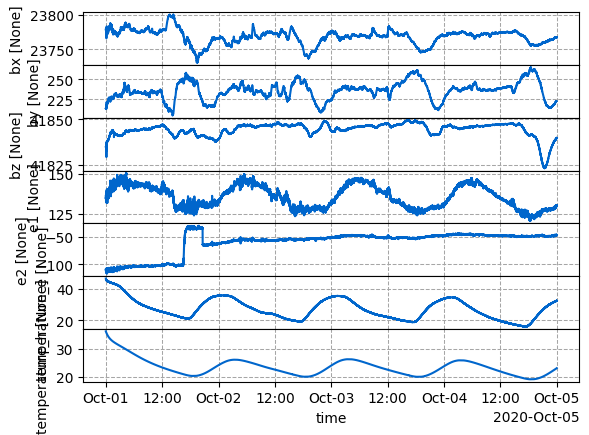

In [13]:
run_plot = run_ts_object.plot()

## Close the MTH5

This is important, you should close the file after you are done using it.  Otherwise bad things can happen if you try to open it with another program or Python interpreter.

In [14]:
m.close_mth5()

2024-10-05T14:46:43.832946-0700 | INFO | mth5.mth5 | close_mth5 | Flushing and closing /home/kkappler/software/irismt/earthscope-mt-course/data/time_series/lemi/from_lemi.h5
